**Judul    : Prediksi kesehatan janin untuk mencegah terjadinya keguguran pada ibu hamil dengan Feature Selection dan KNN**

Nama     : Nirwana Safitri

NIM      : A11.2023.15456

**Ringkasan :**
Kesehatan janin sangat penting untuk diketahui oleh calon ibu sejak dini, karena sampai saat ini banyak calon ibu yang tidak mengetahui tentang Kesehatan janin sehingga menyebabkan kematian janin.

**Permasalahan :**
Peristiwa kematian janin diakibatkan karena kurangnya kesadaran dan pengetahuan tentang Kesehatan janin pada masa kehamilan dan tidak adanya penyelenggaraan sosialisasi tentang Kesehatan janin untuk calon ibu. Untuk melahirkan janin/anak yang sehat, calon ibu harus mengetahui betapa pentingnya pertumbuhan dan perkembangan janin pada masa kehamilan.

**Tujuan :**
Untuk memprediksi dan mendeteksi Kesehatan janin menggunakan algoritma feature selection, dan KNN.

**Model/Alur Penyelesaian :**

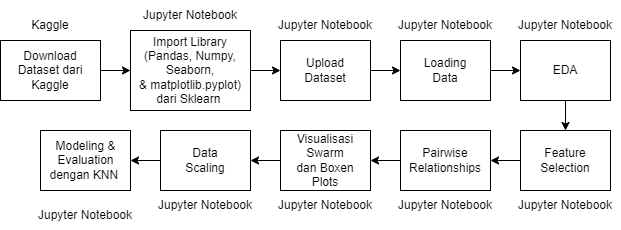

**Penjelasan Dataset**

Dataset yang digunakan adalah dataset fetal_health.csv. Dataset ini berisi informasi tentang berbagai parameter kesehatan janin yang diukur selama kehamilan. Berikut adalah beberapa kolom utama dalam dataset:

**baseline value:** Nilai dasar detak jantung janin.
**accelerations:** Jumlah akselerasi detak jantung janin.
**fetal_movement:** Jumlah gerakan janin.
**uterine_contractions:** Jumlah kontraksi uterus.
**light_decelerations:** Jumlah deselerasi ringan dalam detak jantung janin.
**severe_decelerations:** Jumlah deselerasi berat dalam detak jantung janin.
**prolongued_decelerations:** Jumlah deselerasi yang berkepanjangan.
**abnormal_short_term_variability:** Variabilitas jangka pendek yang tidak normal dalam detak jantung janin.
**mean_value_of_short_term_variability:** Nilai rata-rata dari variabilitas jangka pendek.
**percentage_of_time_with_abnormal_long_term_variability:** Persentase waktu dengan variabilitas jangka panjang yang tidak normal.
**histogram_width:** Lebar histogram dari detak jantung janin.
**histogram_min:** Nilai minimum dari histogram detak jantung janin.
**histogram_max:** Nilai maksimum dari histogram detak jantung janin.
**histogram_number_of_peaks:** Jumlah puncak dalam histogram detak jantung janin.
**histogram_number_of_zeroes:** Jumlah nol dalam histogram detak jantung janin.
**histogram_mode:** Mode dari histogram detak jantung janin.
**histogram_mean:** Nilai rata-rata dari histogram detak jantung janin.
**histogram_median:** Median dari histogram detak jantung janin.
**histogram_variance:** Variansi dari histogram detak jantung janin.
**histogram_tendency:** Kecenderungan histogram dari detak jantung janin.
**fetal_health:** Klasifikasi kesehatan janin (1 = Normal, 2 = Suspect, 3 = Pathological).

***Proses Learning***

**Import Libraries**

Mengimpor library yang diperlukan : pandas, numpy, matplotlib, seaborn, dan berbagai modul dari sklearn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

Membaca dataset `fetal_health.csv` ke dalam DataFrame `fetal` menggunakan `pd.read_csv`.

In [ ]:
fetal = pd.read_csv("fetal_health.csv")
fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**EDA**

1.   Menampilkan Info
2.   Visualisasi Distribusi
3.   Visualisasi Distribusi Fetal Health
4.   Matriks Korelasi

1. **EDA (Menampilkan Info)**

In [ ]:
## mendapatkan informasi tentang dataset, termasuk jumlah nilai non-null dan tipe data untuk setiap kolom.
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
## memeriksa nilai yang hilang dalam dataset.
fetal.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

2. **EDA (Visualisasi Distribusi)**

Membuat histogram dari semua kolom numerik, ukuran gambar ditetapkan menjadi 15 inci x 15 inci

Sumbu x menunjukkan rentang nilai data, Sumbu y menunjukkan frekuensi data

array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

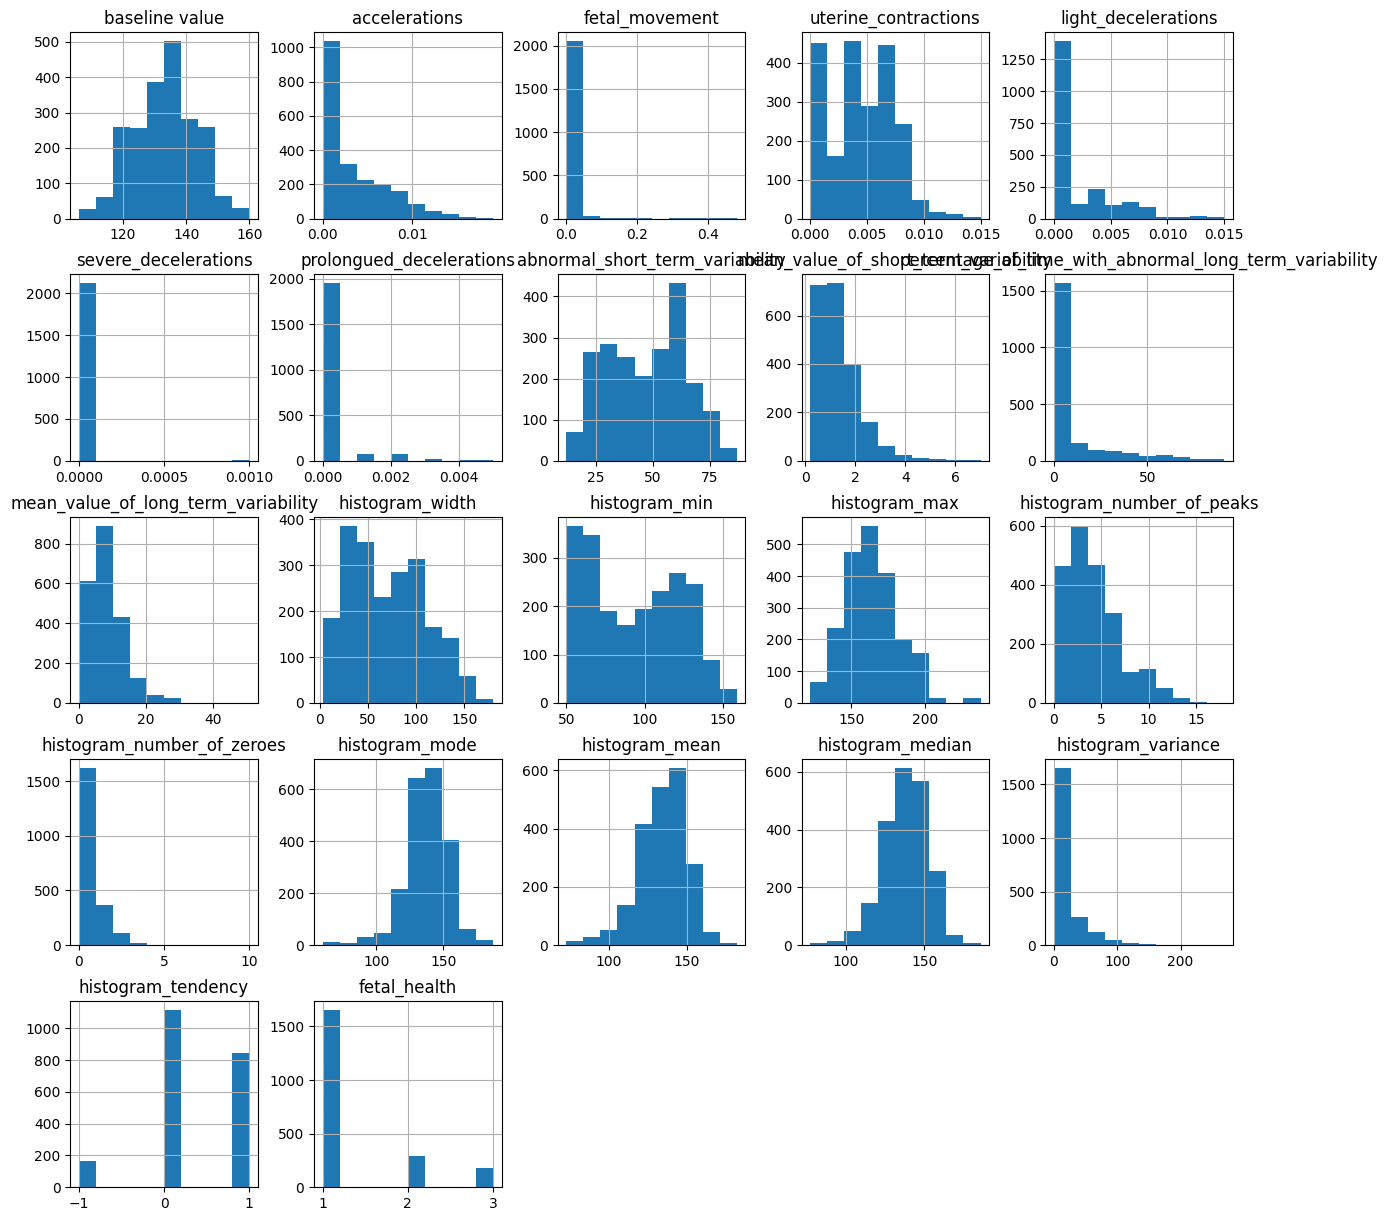

In [ ]:
## Membuat histogram dari semua fitur untuk melihat distribusi masing-masing fitur.
fetal.hist(figsize=[15,15])

<ipython-input-20-453df555c671>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= fetal, x="fetal_health",palette=colours)


<function matplotlib.pyplot.show(close=None, block=None)>

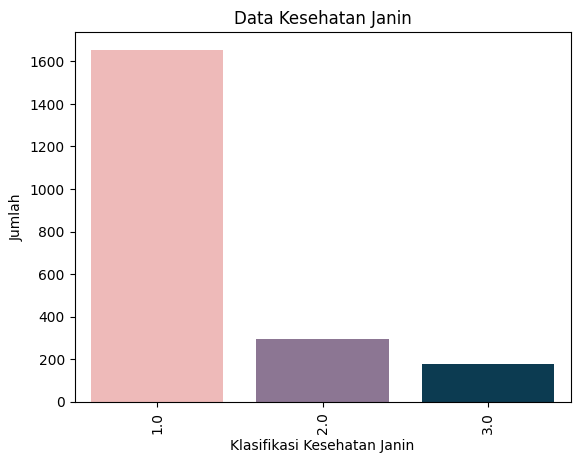

In [ ]:
## memvisualisasikan jumlah sampel untuk setiap kelas dalam fitur 'fetal_health'.
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= fetal, x="fetal_health",palette=colours)
plt.title("Data Kesehatan Janin")
plt.xlabel("Klasifikasi Kesehatan Janin")
plt.ylabel("Jumlah")
plt.xticks(rotation = 'vertical')
plt.show

In [ ]:
# mengetahui dimensi dari DataFrame 'fetal'
fetal.shape

(2126, 22)

3. **EDA (Visualisasi Distribusi Fetal Health)**

Menggunakan *`sns.displot(data=fetal, x='fetal_health', color='green', kde=True)`* untuk memvisualisasikan distribusi kelas ***fetal_health***.

<Figure size 1200x1000 with 0 Axes>

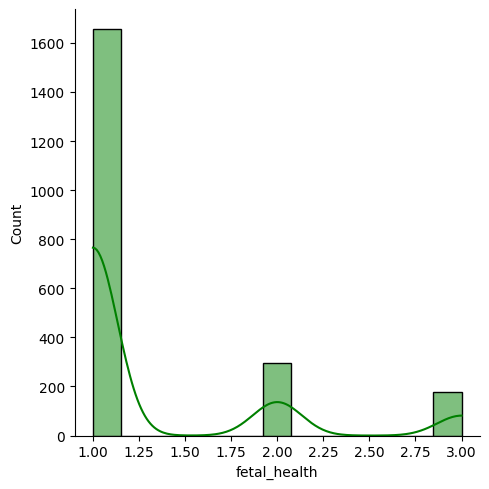

In [ ]:
# membuat distribution plot dengan ukuran gambar t=12,l=10, dan berwarna hijau
plt.figure(figsize=(12,10))
sns.displot(data=fetal, x='fetal_health', color='green', kde=True)
plt.show()

4. **EDA (Matriks Korelasi)**

Menghitung matriks korelasi dengan *`corrmat = fetal.corr()`* dan memvisualisasikannya menggunakan heatmap dengan *`sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)`* untuk melihat hubungan antar fitur.

<Axes: >

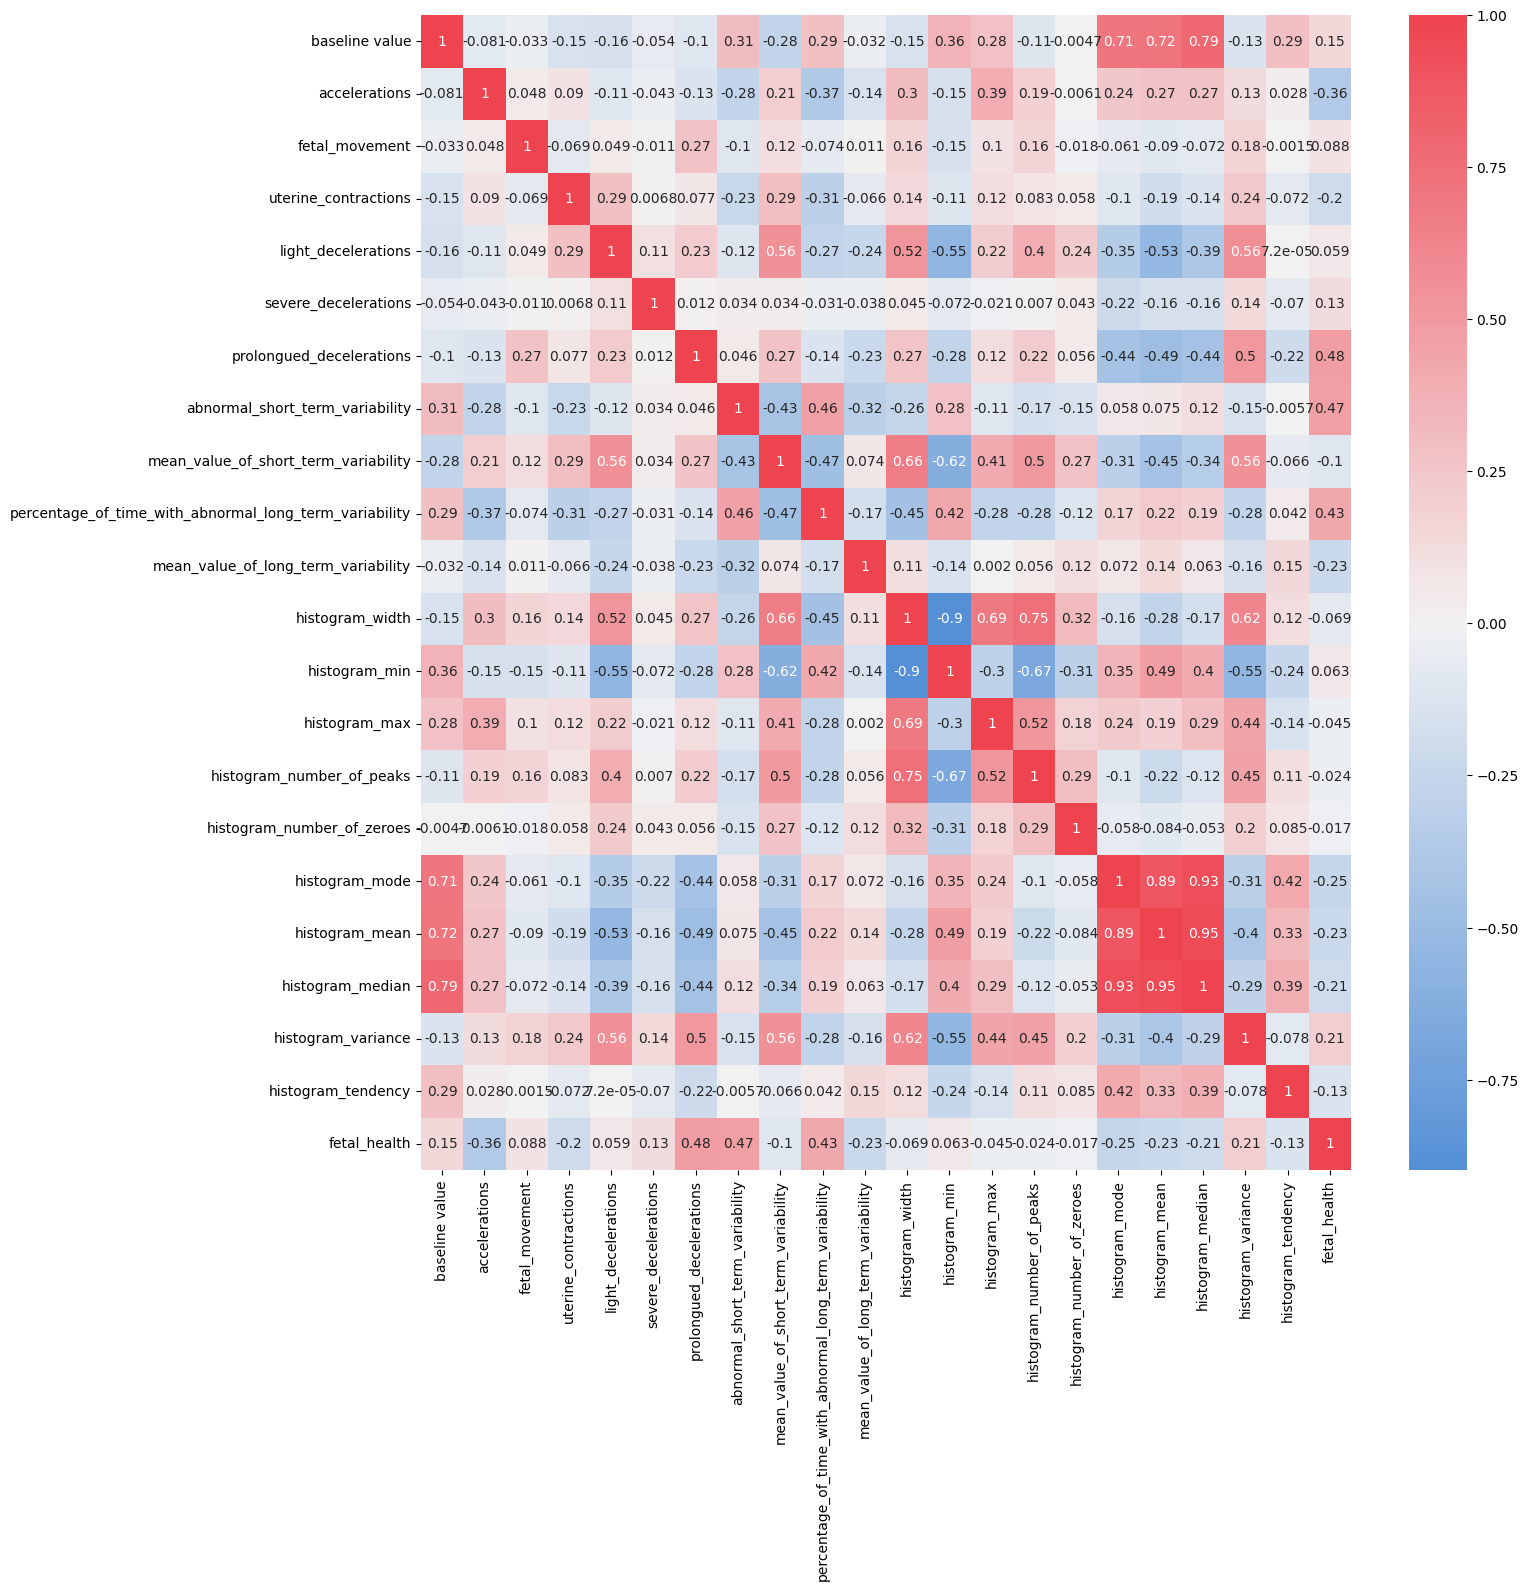

In [ ]:
# membuat heatmap untuk menunjukkan matriks korelasi dari DataFrame 'fetal'.
corrmat= fetal.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

**Feature Selection**

Menghitung korelasi antara setiap fitur dan fetal_health dengan `*fetal_corr = fetal.corr()['fetal_health'][:-1].*`

Memilih fitur yang memiliki korelasi absolut lebih besar dari 0.3 dengan `*fetal_use = fetal_corr[abs(fetal_corr)>0.3].sort_values(ascending=False).*`

In [ ]:
# menghitung korelasi antara setiap kolom dalam DataFrame 'fetal' dengan kolom 'fetal_health'
# [:-1] adalah slicing yang menghilangkan nilai korelasi terakhir dalam Seri.
# untuk menghilangkan nilai korelasi 'fetal_health' dengan dirinya sendiri, yang selalu 1.
fetal_corr = fetal.corr()['fetal_health'][:-1]
fetal_corr

baseline value                                            0.148151
accelerations                                            -0.364066
fetal_movement                                            0.088010
uterine_contractions                                     -0.204894
light_decelerations                                       0.058870
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_width                                          -0.068789
histogram_min                                             0.063175
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.02

In [ ]:
# memfilter dan mengurutkan nilai-nilai korelasi yang cukup signifikan dari sebuah DataFrame
fetal_use = fetal_corr[abs(fetal_corr)>0.3].sort_values(ascending=False)
fetal_use

prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                            -0.364066
Name: fetal_health, dtype: float64

**Pairwise Relationships**

Membuat scatter plots untuk fitur yang dipilih menggunakan `*sns.PairGrid*` untuk melihat hubungan antara fitur-fitur tersebut dan 'fetal_health'.


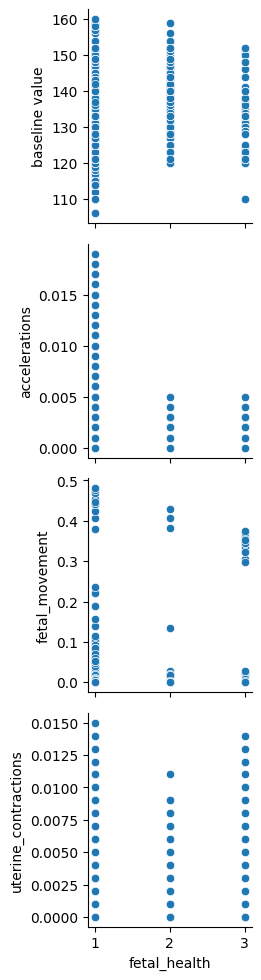

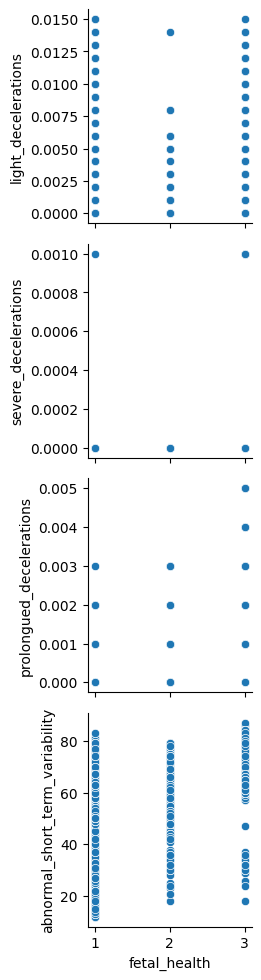

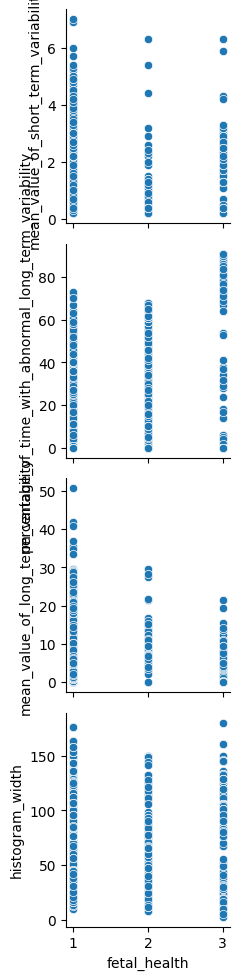

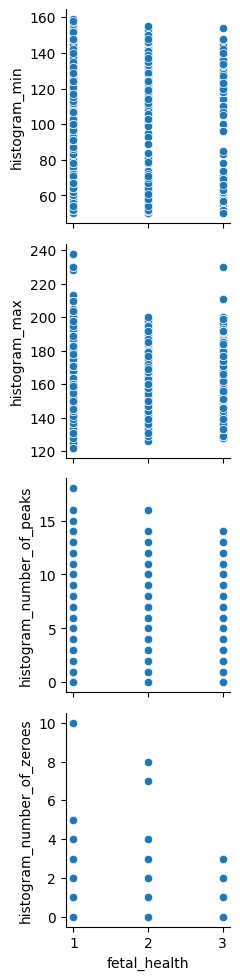

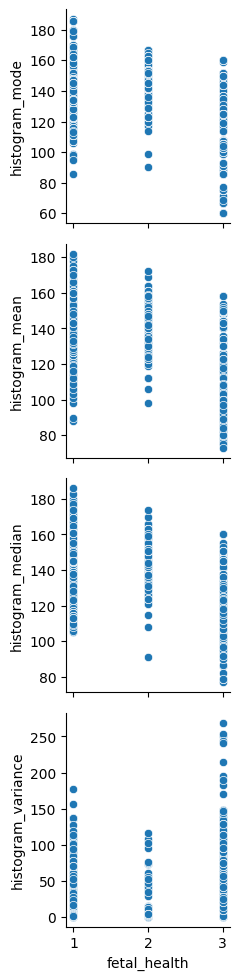

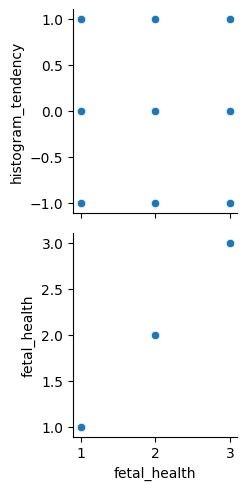

In [ ]:
# membuat grid visualisasi dari scatter plot
for i in range(0, len(fetal.columns),4):
    g = sns.PairGrid(data = fetal, x_vars=['fetal_health'],y_vars= fetal.columns[i:i+4])
    g.map(sns.scatterplot)

**Visualisasi Swarm dan Boxen Plots:**

Menggunakan s*warm plot dan boxen plot* untuk memvisualisasikan distribusi fitur yang dipilih dibandingkan dengan 'fetal_health'.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


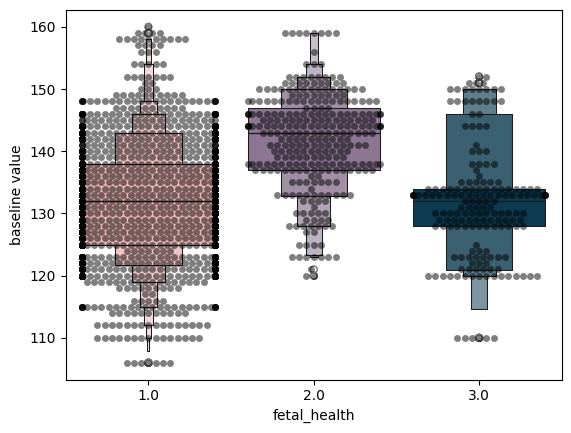

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

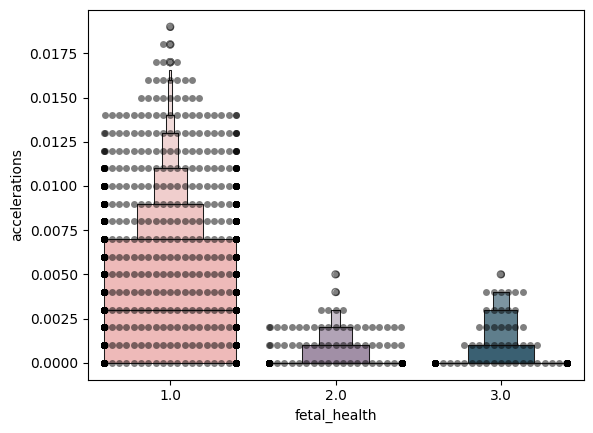

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

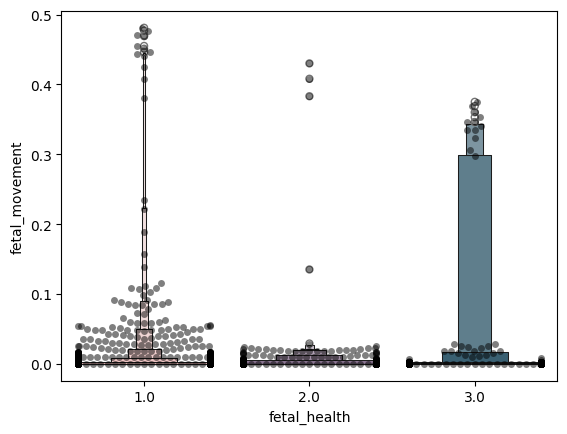

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

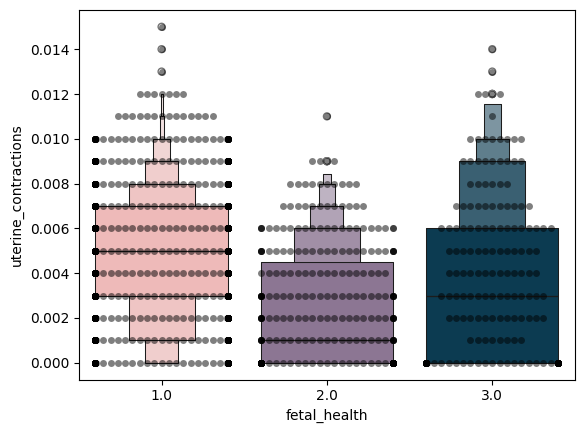

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

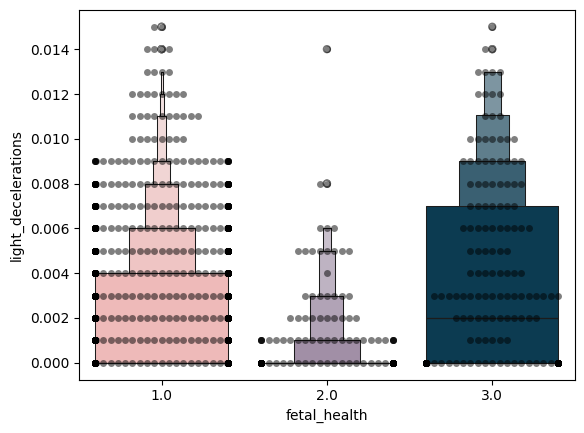

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

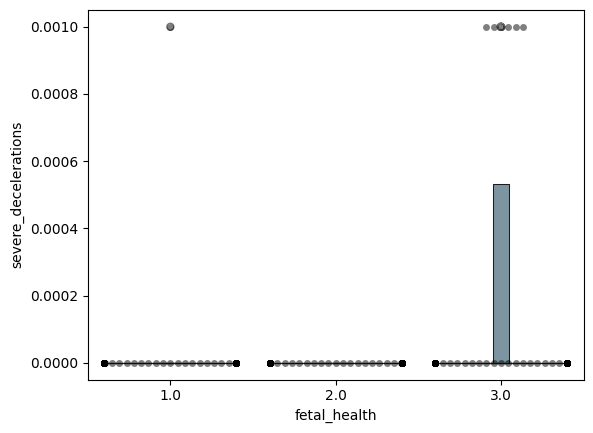

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

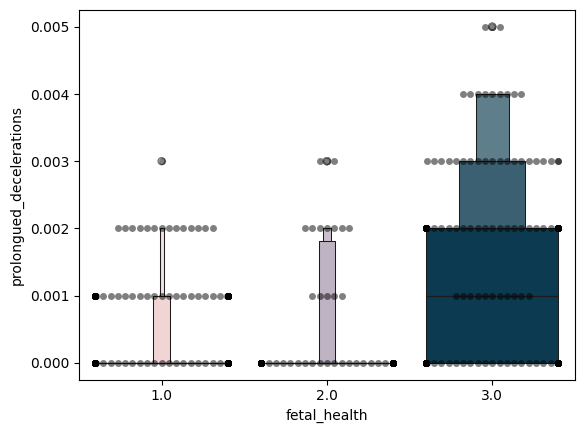

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/c

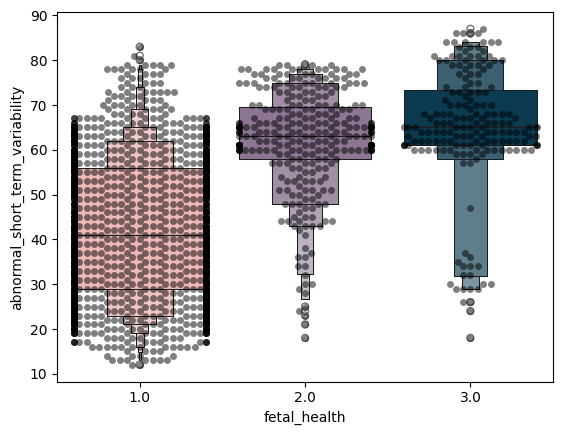

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

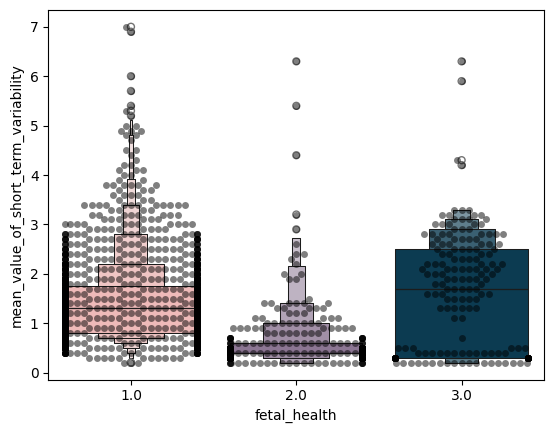

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/c

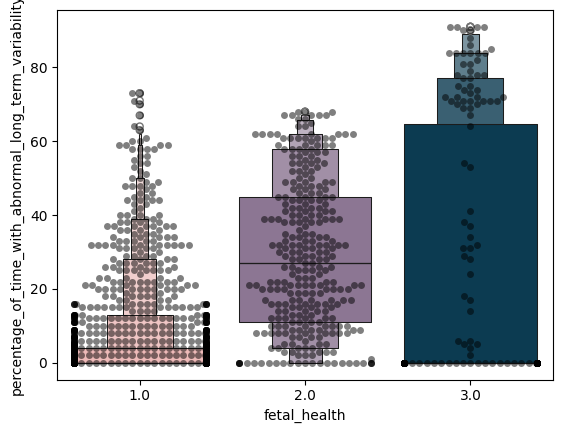

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

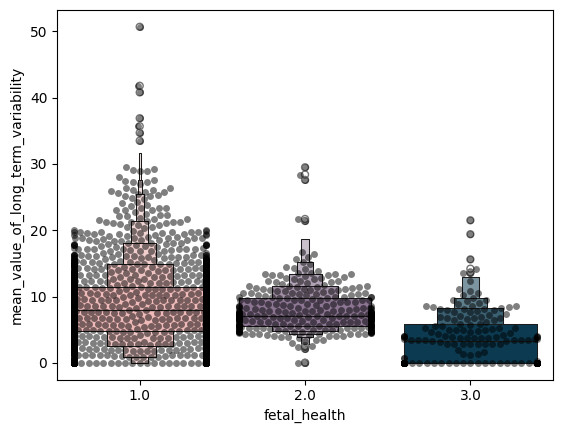

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 60.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/ca

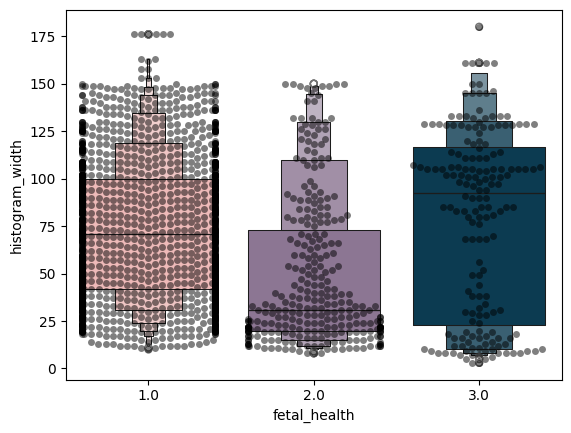

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


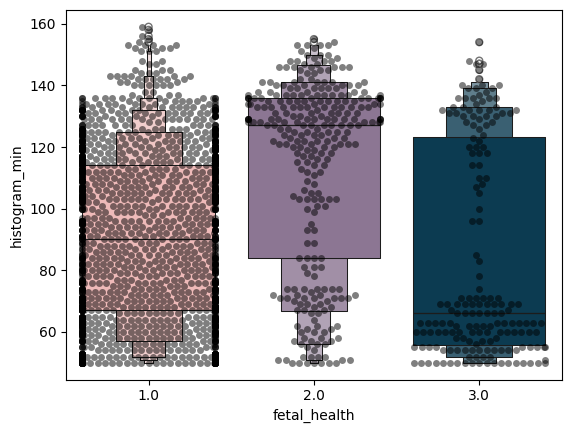

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/ca

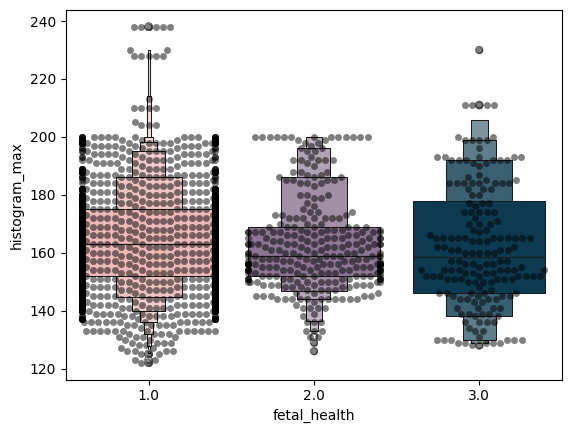

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/c

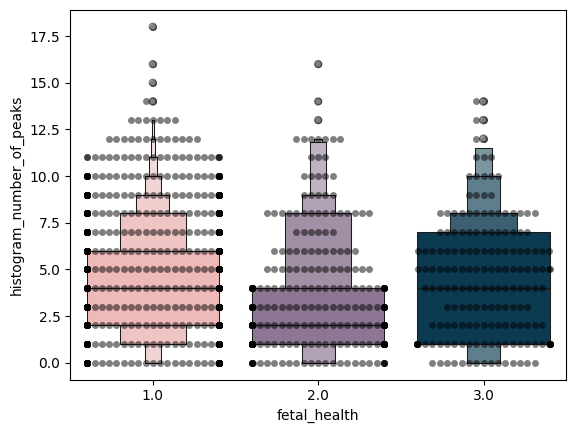

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

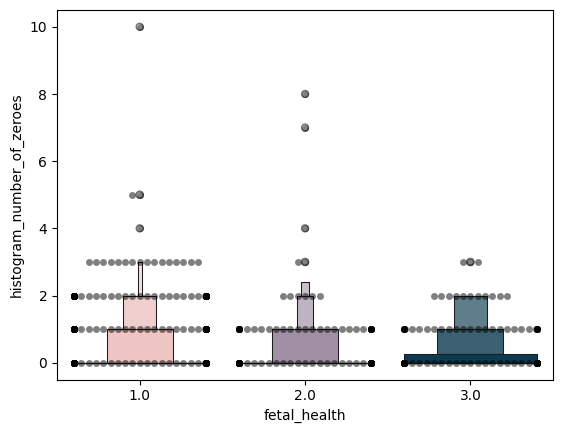

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/c

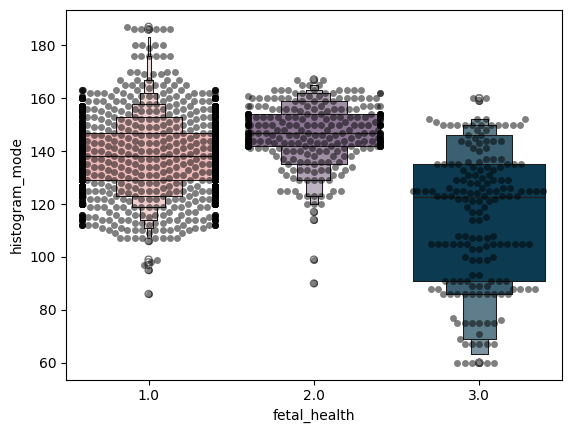

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/ca

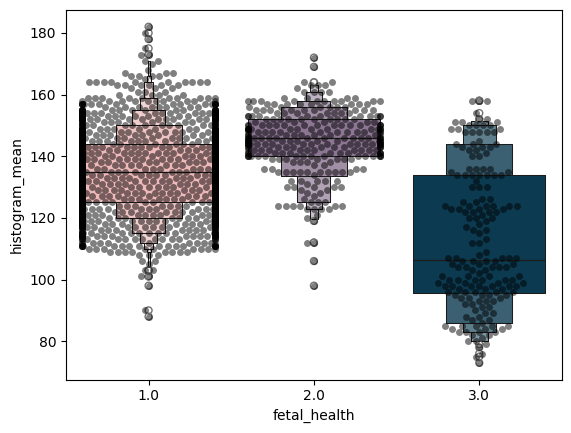

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/c

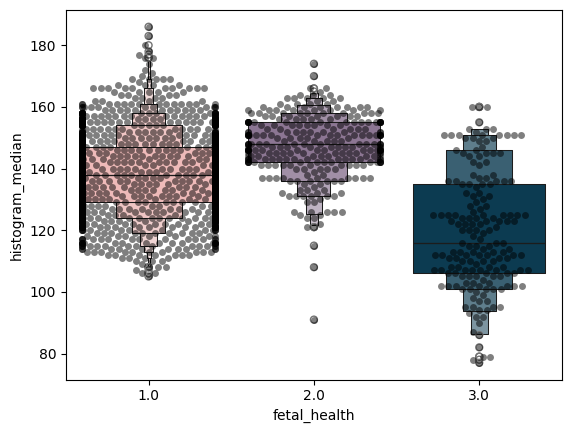

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

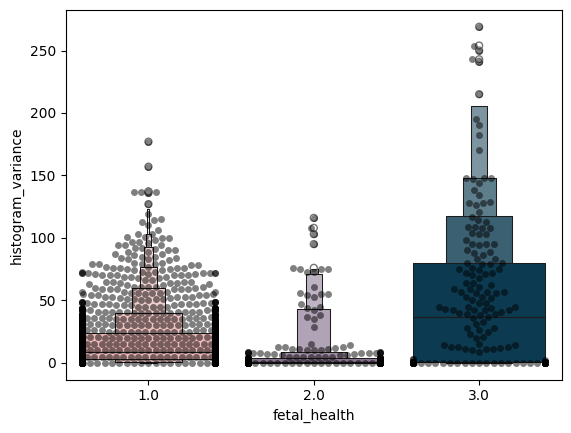

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

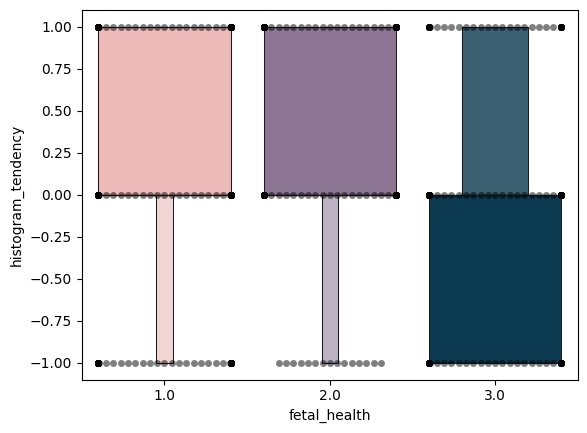

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-27-1c968a609ac4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
/usr/local/lib/python3.10/dist-packages/seaborn/c

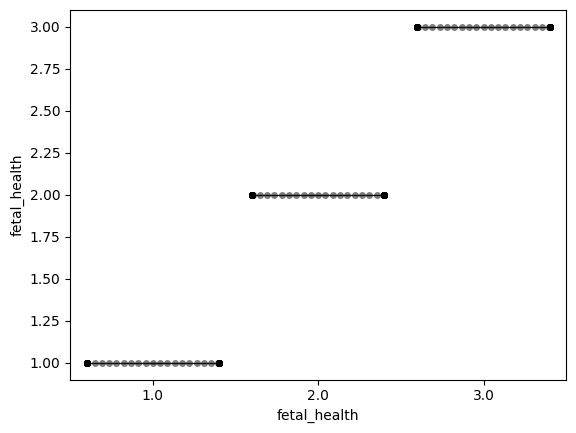

In [ ]:
# visualisasi yang membandingkan distribusi variabel dalam DataFrame fetal dengan swarm plot & boxen plot
for i in fetal:
    sns.swarmplot(x=fetal["fetal_health"], y=fetal[i], color="black", alpha=0.5 )
    sns.boxenplot(x=fetal["fetal_health"], y=fetal[i], palette=colours)
    plt.show()

In [ ]:
#  ringkasan statistik deskriptif dari DataFrame 'fetal' dan kemudian mentranspose hasilnya.
fetal.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**Data Scaling**

Memisahkan fitur dan target dengan `*X = fetal.drop(["fetal_health"]*`, axis=1) `*Kode inline*`dan `*y = fetal["fetal_health"]*`.

Menggunakan *StandardScaler* untuk menstandarisasi fitur sehingga setiap fitur memiliki mean 0 dan standard deviation 1.

Membuat DataFrame baru dari fitur yang sudah di-standardisasi dengan `*X_df = pd.DataFrame(X_df, columns=col_names)*`.

In [ ]:
# menstandarisasi fitur dalam DataFrame fetal dan menghasilkan ringkasan statistik deskriptif dari fitur yang telah dinormalisasi.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#menetapkan nilai ke fitur sebagai X dan menargetkan sebagai y
X=fetal.drop(["fetal_health"],axis=1)
y=fetal["fetal_health"]

#menyiapkan scaler standar untuk fitur
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


<ipython-input-30-93e7f5bf54a4>:4: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = shades)


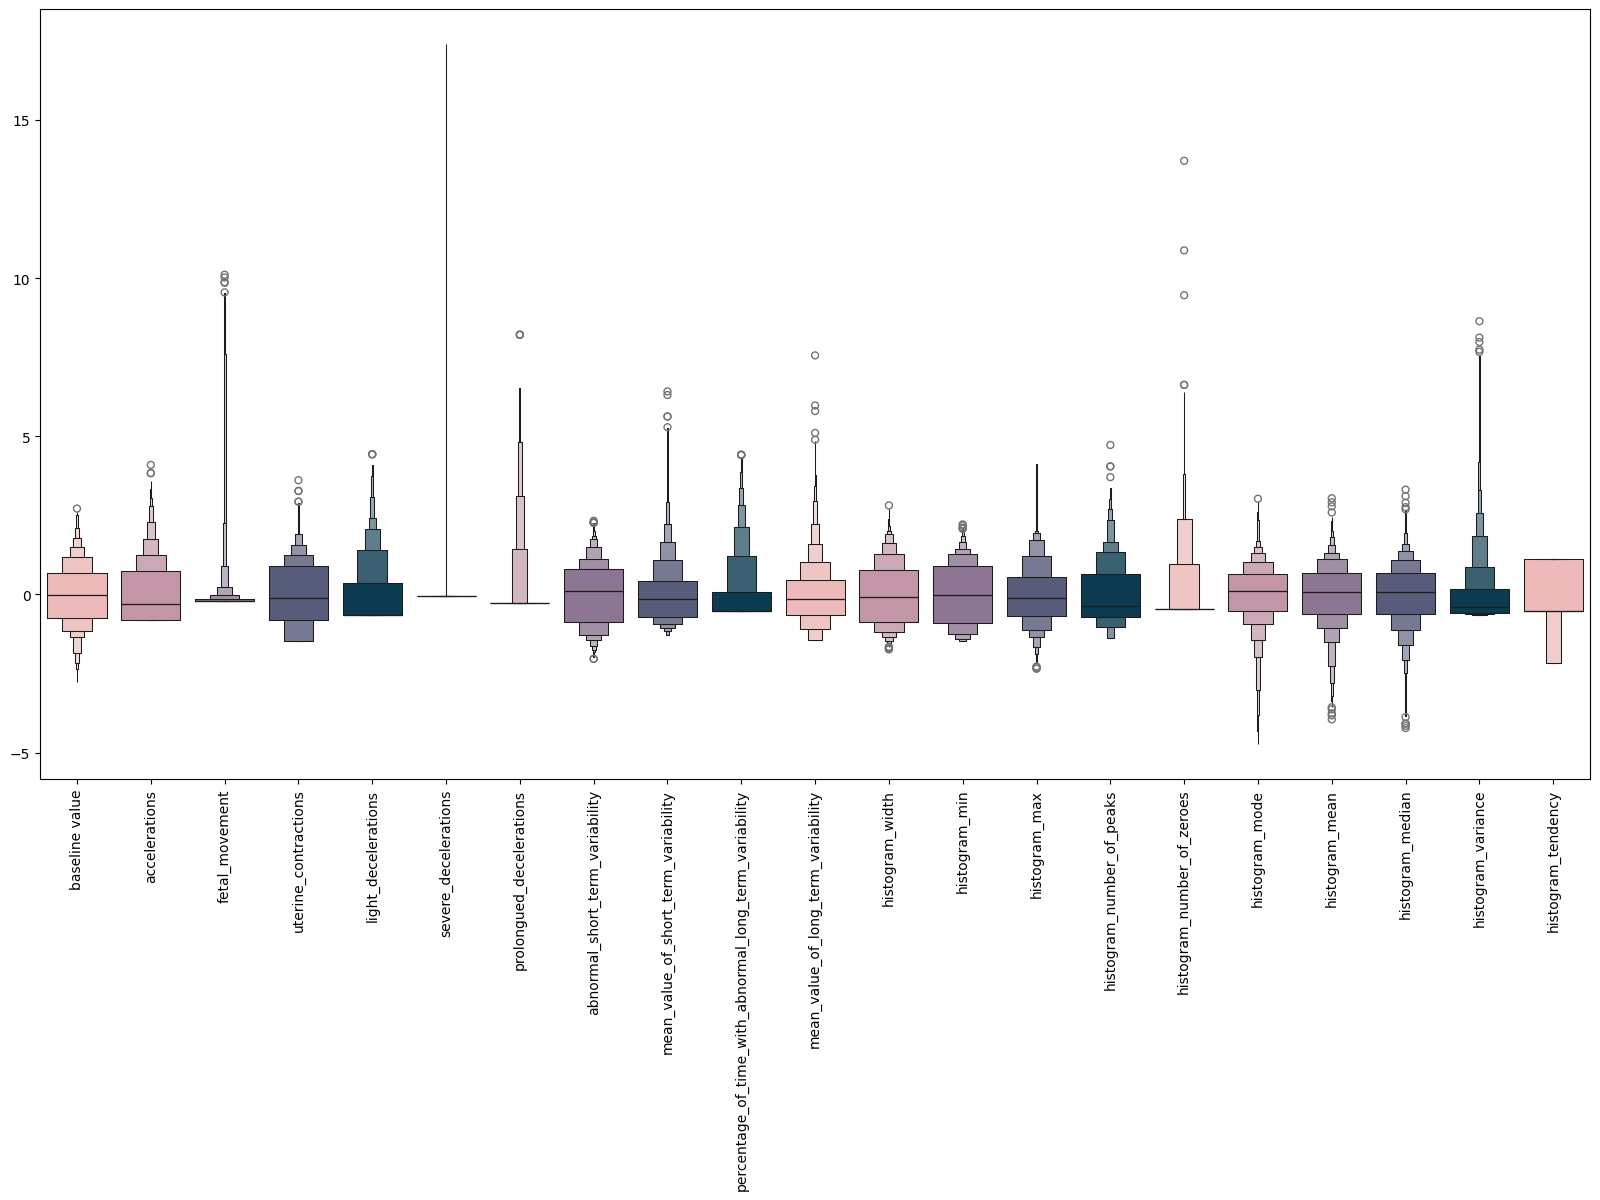

In [ ]:
#melihat fitur yang diskalakan
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

**Modeling & Evaluation dengan KNN**

1. Membagi data menjadi set pelatihan dan pengujian.
2.Melatih model KNN dan melakukan prediksi.
3. Mengevaluasi model dengan confusion matrix dan classification report.



In [ ]:
# memilih subset fitur dan menetapkan target untuk analisis atau pemodelan.
#subset fitur
X = fetal[['accelerations','prolongued_decelerations', 'abnormal_short_term_variability',
          'percentage_of_time_with_abnormal_long_term_variability']]
# target
y = fetal["fetal_health"]

**1. Membagi data menjadi set pelatihan dan pengujian.**

In [ ]:
# membagi data menjadi set pelatihan dan set pengujian
from sklearn.model_selection import train_test_split
# 30% dari data akan digunakan untuk set pengujian, dan sisanya 70% akan digunakan untuk set pelatihan.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# menghitung mean dan deviasi standar dari data pelatihan
scaler = StandardScaler()
# Menghitung mean dan deviasi standar dari fitur-fitur di X_train untuk menghindari kebocoran data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**2.Melatih model KNN dan melakukan prediksi.**

In [ ]:
# Mengimpor kelas KNeighborsClassifier dari modul sklearn.neighbors.
# Kelas ini digunakan untuk melakukan klasifikasi dengan algoritma K-Nearest Neighbors.
from sklearn.neighbors import KNeighborsClassifier
# menggunakan 5 tetangga terdekat untuk melakukan klasifikasi
klasifikasi = KNeighborsClassifier(n_neighbors=5)
klasifikasi.fit(X_train, y_train)
y_pred = klasifikasi.predict(X_test)

In [ ]:
# mendapatkan probabilitas prediksi dari model klasifikasi KNN dari setiap kelas pada data pengujian
klasifikasi.predict_proba(X_test)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.2, 0. , 0.8],
       ...,
       [0.2, 0.8, 0. ],
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ]])

**3. Mengevaluasi model dengan confusion matrix dan classification report.**

In [ ]:
# mengevaluasi kinerja model dengan menunjukkan berapa banyak prediksi yang benar dan salah untuk setiap kelas
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[464  20  12]
 [ 28  71   2]
 [  5   1  35]]


In [ ]:
# laporan detail dari metrik evaluasi model klasifikasi.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.93       496
         2.0       0.77      0.70      0.74       101
         3.0       0.71      0.85      0.78        41

    accuracy                           0.89       638
   macro avg       0.81      0.83      0.82       638
weighted avg       0.89      0.89      0.89       638



In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.8934169278996865